<a href="https://colab.research.google.com/github/NuTTaoo/NBA_Stat/blob/main/NBA_Stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 แต้มกับการทำ Rebound

ในการชู๊ต 3 แต้มมี โอกาสไม่ลง กี่ %

ทีมที่สามารถครองบอลได้หลังจากไม่ลงห่วง คือการ รีบาวจะมาดูว่าความเสี่ยงที่ฝ่ายตรงข้ามจะได้บอล เป็น อย่างไร drb
ตำแหน่งที่สามารถ Rebound ได้

การ Rebound เริ่มเก็บสถิติตั้งแต่ปี 1973-74 season in the NBA

3PA - 3-Point Field Goal Attempts (available since the 1979-80 season in the NBA)

[Basketball_Vocab](https://www.basketball-reference.com/about/glossary.html)

# Import Model

In [ ]:
import sys
import pandas as pd
import numpy as np
import IPython
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from IPython.display import display

# Meaning Variance

In [ ]:
df_memo = pd.read_csv('https://raw.githubusercontent.com/NuTTaoo/NBA_Stat/main/Data_Set/Memo.csv')
df_memo.info()
df_memo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Column  35 non-null     object
 1   Memo    35 non-null     object
dtypes: object(2)
memory usage: 688.0+ bytes


,Column,Memo
0,seas_id,id
1,season,ปี
2,player_id,ID ผู้เล่น
3,player,ชื่อ ผู้เล่น
4,birth_year,ปีเกิด
5,pos,ตำแหน่งใน Team
6,age,อายุ
7,experience,ประสบการณ์
8,lg,Leage
9,tm,Team


# Data_Prepare

 ## Filter Year & Select_Add Column

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/NuTTaoo/NBA_Stat/main/Data_Set/Player%20Totals.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31870 entries, 0 to 31869
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seas_id       31870 non-null  int64  
 1   season        31870 non-null  int64  
 2   player_id     31870 non-null  int64  
 3   player        31870 non-null  object 
 4   birth_year    2870 non-null   float64
 5   pos           31870 non-null  object 
 6   age           31848 non-null  float64
 7   experience    31870 non-null  int64  
 8   lg            31870 non-null  object 
 9   tm            31870 non-null  object 
 10  g             31870 non-null  int64  
 11  gs            23233 non-null  float64
 12  mp            30787 non-null  float64
 13  fg            31870 non-null  int64  
 14  fga           31870 non-null  int64  
 15  fg_percent    31713 non-null  float64
 16  x3p           25518 non-null  float64
 17  x3pa          25518 non-null  float64
 18  x3p_percent   21342 non-nu

In [ ]:
df_3pa_trend = df.loc[ df['season']  > 1979 , ['season','x3pa', 'x3p', 'x2pa', 'x2p','orb', 'drb' , 'trb', 'ft', 'fta','fg', 'fga','pts' ] ]
df_groupby_year = df_3pa_trend.groupby(['season'])[['x3pa','x3p', 'x2pa', 'x2p','orb', 'drb' , 'trb', 'ft', 'fta','fg','fga','pts']].agg('sum')
df_groupby_year['3pts'] = (df_groupby_year['x3p']*3) #Get 3 Score
df_groupby_year['2pts'] = (df_groupby_year['x2p']*2) #Get 2 Score
df_groupby_year['3pts%'] = ((df_groupby_year['3pts'] / df_groupby_year['pts'])*100).apply(lambda x: round(x,2))
df_groupby_year['2pts%'] = ((df_groupby_year['2pts'] / df_groupby_year['pts'])*100).apply(lambda x: round(x,2))
df_groupby_year['ft%'] = ((df_groupby_year['ft'] / df_groupby_year['pts'])*100).apply(lambda x: round(x,2))
df_groupby_year['x3p_percent'] = ((df_groupby_year['x3p'] / df_groupby_year['x3pa'])*100).apply(lambda x: round(x,2))
df_groupby_year['x2p_percent'] = ((df_groupby_year['x2p'] / df_groupby_year['x2pa'])*100).apply(lambda x: round(x,2))
df_groupby_year['ft_percent'] = ((df_groupby_year['ft'] / df_groupby_year['fta'])*100).apply(lambda x: round(x,2))
df_groupby_year.style.format("{:,}".format, subset=df_groupby_year.select_dtypes(include=['number']).columns)

,x3pa,x3p,x2pa,x2p,orb,drb,trb,ft,fta,fg,fga,pts,3pts,2pts,3pts%,2pts%,ft%,x3p_percent,x2p_percent,ft_percent
season,,,,,,,,,,,,,,,,,,,,
1980,"5,522.0","1,561.0","176,190","85,753","30,284.0","60,200.0","90,484.0","42,447","55,752","87,314","181,712","218,636","4,683.0","171,506",2.14,78.44,19.41,28.27,48.67,76.14
1981,"4,161.0","1,035.0","172,754","84,581","28,755.0","57,247.0","86,002.0","42,984","57,258","85,616","176,915","215,251","3,105.0","169,162",1.44,78.59,19.97,24.87,48.96,75.07
1982,"4,655.0","1,206.0","175,326","86,996","29,325.0","59,145.0","88,470.0","43,159","57,980","88,202","179,981","220,769","3,618.0","173,992",1.64,78.81,19.55,25.91,49.62,74.44
1983,"4,592.0","1,091.0","179,734","88,038","30,808.0","61,420.0","92,228.0","42,989","58,172","89,129","184,326","222,338","3,273.0","176,076",1.47,79.19,19.33,23.76,48.98,73.9
1984,"4,599.0","1,139.0","165,331","82,391","27,277.0","55,252.0","82,529.0","43,334","57,153","83,530","169,930","211,533","3,417.0","164,782",1.62,77.9,20.49,24.77,49.83,75.82
1985,"6,008.0","1,692.0","165,544","82,499","27,838.0","56,391.0","84,229.0","43,112","56,486","84,191","171,552","213,186","5,076.0","164,998",2.38,77.4,20.22,28.16,49.84,76.32
1986,"6,677.0","1,886.0","166,997","82,492","27,618.0","57,836.0","85,454.0","44,821","59,266","84,378","173,674","215,463","5,658.0","164,984",2.63,76.57,20.8,28.25,49.4,75.63
1987,"9,177.0","2,753.0","165,247","80,896","29,013.0","57,476.0","86,489.0","45,573","59,895","83,649","174,424","215,624","8,259.0","161,792",3.83,75.03,21.14,30.0,48.95,76.09
1988,"10,735.0","3,433.0","172,389","84,316","29,599.0","61,084.0","90,683.0","46,334","60,556","87,749","183,124","225,265","10,299.0","168,632",4.57,74.86,20.57,31.98,48.91,76.51


In [ ]:
#df_groupby_year.info()

In [ ]:
#df_pair_plot = sns.pairplot(df_groupby_year, height=2.5, aspect=1)

# Analytical


## 3-Point Attempts Trend

In [ ]:
x = np.arange(df_groupby_year.index.size) # Use .index to access the index of the DataFrame
fit = np.polyfit(x, df_groupby_year['x3pa'], deg=1)
#print ("Slope : " + str(fit[0]))
#print ("Intercept : " + str(fit[1]))

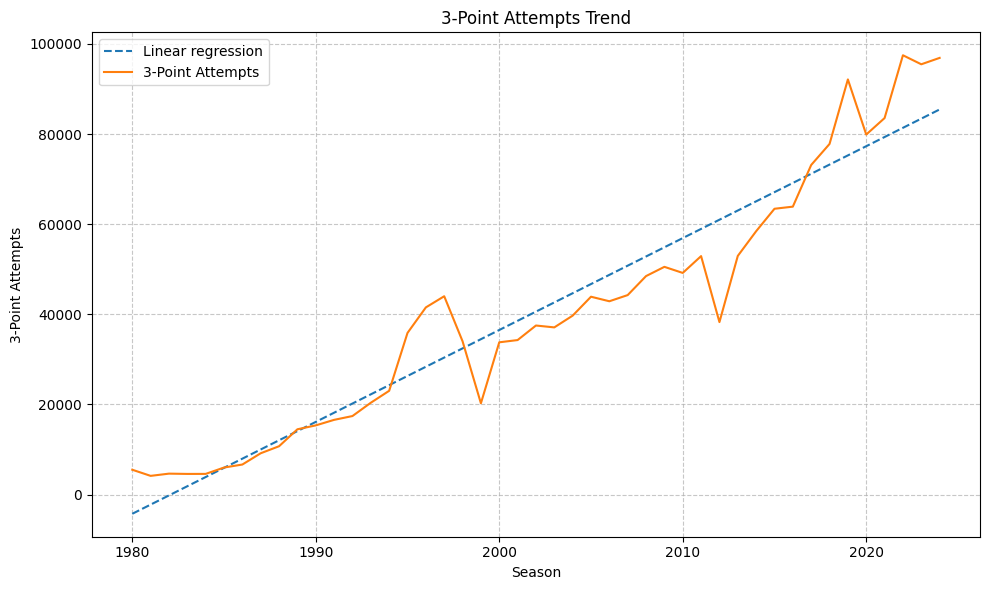

In [ ]:
fit_function = np.poly1d(fit)
plt.figure(figsize=(10, 6))
#Linear regression plot
plt.plot(df_groupby_year.index, fit_function(x), linestyle='--', label='Linear regression')
#Time series data plot
plt.plot(df_groupby_year.index, df_groupby_year['x3pa'], label='3-Point Attempts')
plt.xlabel('Season')
plt.ylabel('3-Point Attempts')
plt.title('3-Point Attempts Trend')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

จากที่การชู๊ต 3 แต้มมีความสำคัญต่อเกมมากยิ่งขึ้น การได้มาซึ่งคะแนน 3 คะแนน ก็เพิ่มมากขึ้นในทุกๆ ปี (กราฟสีฟ้า)ในขณะที่การทำคะแนนจาก 2 แต้มมีแนวโน้มลดลง (กราฟสีส้ม)

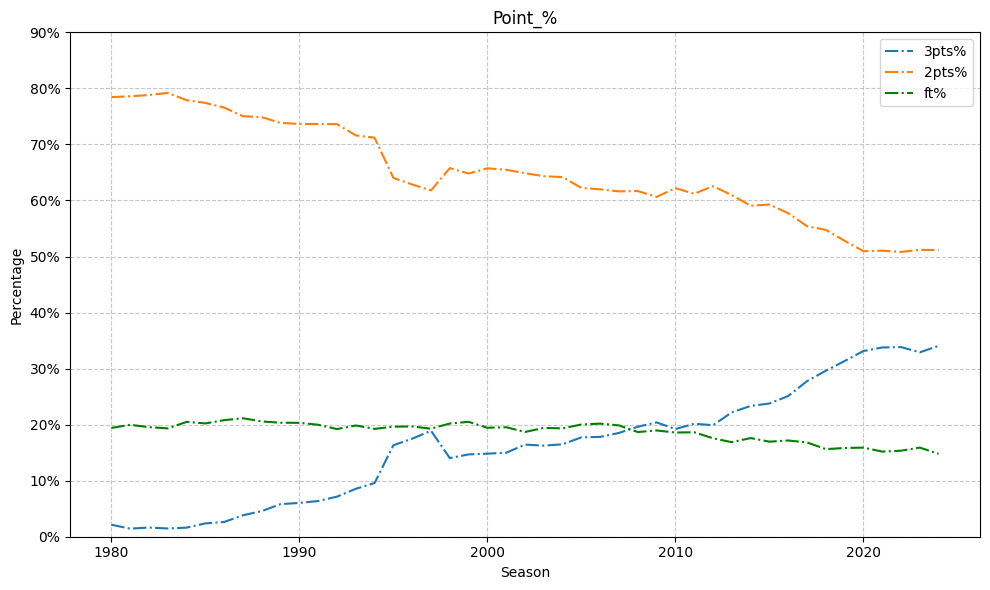

In [ ]:
plt.figure(figsize=(10, 6))
plt.gca().yaxis.set_major_formatter(PercentFormatter())
# Set y-axis limits
plt.ylim(0, 90)
plt.plot(df_groupby_year.index, df_groupby_year['3pts%'], label='3pts%', linestyle='-.')
plt.plot(df_groupby_year.index, df_groupby_year['2pts%'], label='2pts%', linestyle='-.')
plt.plot(df_groupby_year.index, df_groupby_year['ft%'], label='ft%', color='g', linestyle='-.')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.title('Point_%')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

แต่การได้มา 3 แต้ม ไม่ใช่เรื่องง่าย เพราะอัตราการชู้ตลง มีไม่ถึง 40%

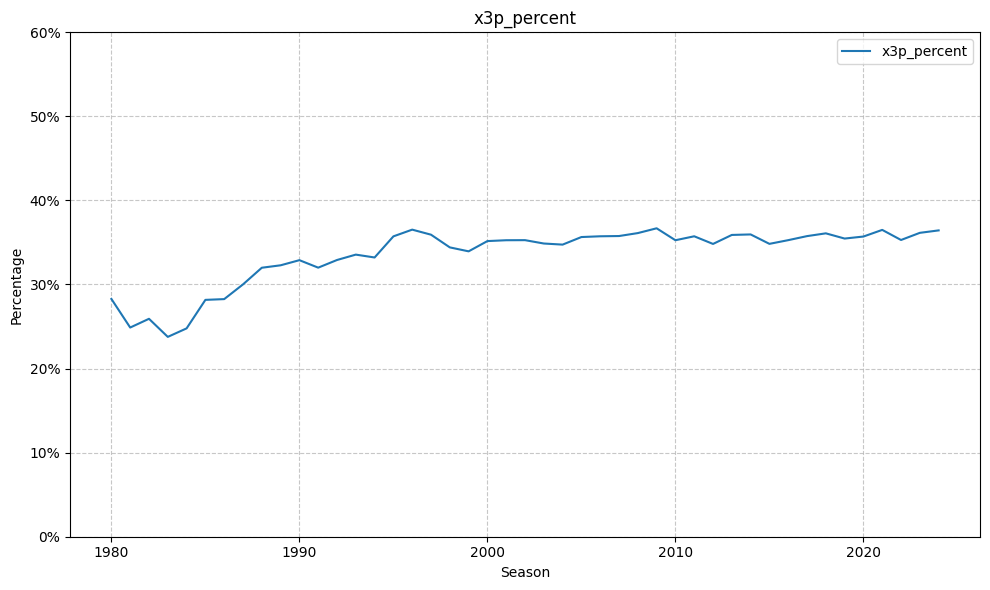

In [ ]:
plt.figure(figsize=(10, 6))
plt.gca().yaxis.set_major_formatter(PercentFormatter())
# Set y-axis limits
plt.ylim(0, 60)
plt.plot(df_groupby_year.index, df_groupby_year['x3p_percent'], label='x3p_percent')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.title('x3p_percent')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Total Rebound & 3-Point Attempts Trend

การชู้ตลูกลง 3 แต้ม น้อยกว่า 40% จะทำให้เกิดการ "Rebound"

Rebound คือการจับลูกหลังการชู้ตลูกพลาด ถือเป็นส่วนสำคัญหนึ่งในเกมเพราะสามารถนำไปสู่การเปลี่ยนมือระหว่างการรุกและรับ โดยแบ่งเป็น

Offensive Rebounds (orb) ทำโดยทีมที่กำลังรุก
Defensive Rebounds (drb) ทำโดยทีมที่กำลังป้องกัน

ถ้าเกิด Offensive Rebounds หมายความว่า ทีมบุกยังสามารถทำแต้ม หรือบุกต่อได้

แต่ถ้า Defensive Rebounds ทีมบุกอาจจะโดนสวนกลับมาจากทีมที่ป้องกัน

Trend จำนวนครั้งที่ชู๊ต 3 แต้มทั้งหมด (กราฟสีน้ำเงิน) กับ การเกิด Rebound (กราฟสีส้ม)

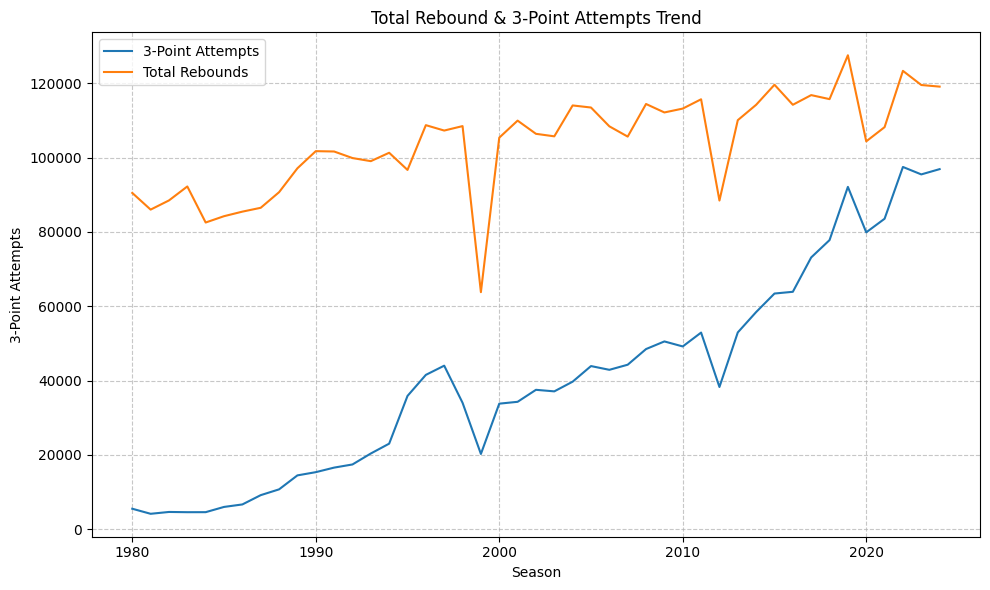

In [ ]:
fit_function = np.poly1d(fit)
plt.figure(figsize=(10, 6))
#Time series data plot
plt.plot(df_groupby_year.index, df_groupby_year['x3pa'], label='3-Point Attempts')
plt.plot(df_groupby_year.index, df_groupby_year['trb'] , label ='Total Rebounds')
plt.xlabel('Season')
plt.ylabel('3-Point Attempts')
plt.title('Total Rebound & 3-Point Attempts Trend')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_3pa_trb_trend = df_groupby_year[['x3pa', 'orb', 'drb' , 'trb']]
df_3pa_trb_trend.style.format("{:,}".format, subset=df_3pa_trb_trend.select_dtypes(include=['number']).columns)
df_3pa_trb_trend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 1980 to 2024
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x3pa    45 non-null     float64
 1   orb     45 non-null     float64
 2   drb     45 non-null     float64
 3   trb     45 non-null     float64
dtypes: float64(4)
memory usage: 2.8 KB


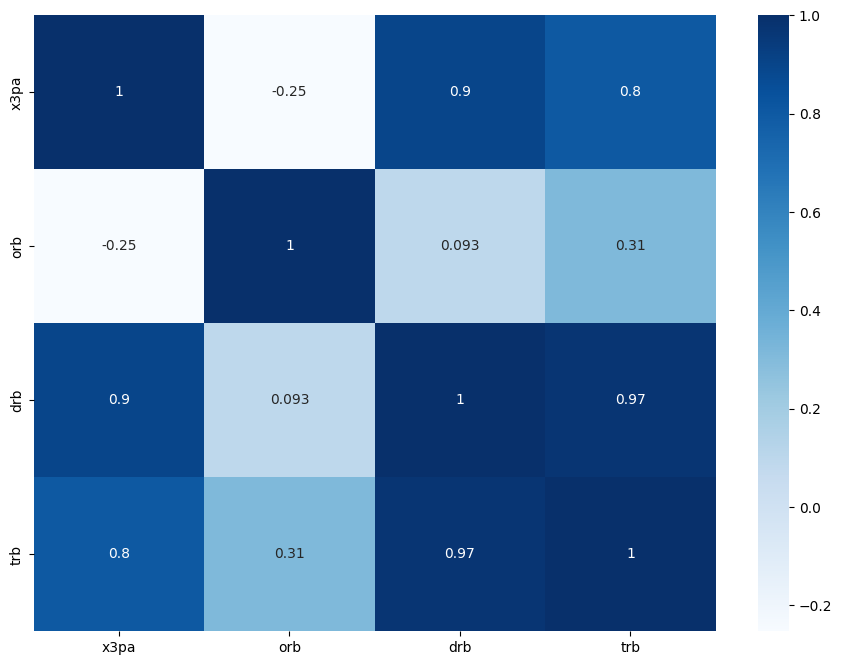

In [ ]:
corr = df_3pa_trb_trend.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.show()

จากความสัมพันระหว่างตัวแปร trb และ drb มีความสัมพันธ์เชิง Positive กับ ตัว แปร x3pa (ยิ่งจำนวนการชูู้ต 3 แต้มสูงขึ้น จำนวนครั้งการ Rebound และ การ Rebound โดย Defensive Rebounds จะเพิ่มขึ้น ในทางกลับกัน orb มีความสัมพันธ์เชิง Negative กับ ตัว แปร x3pa

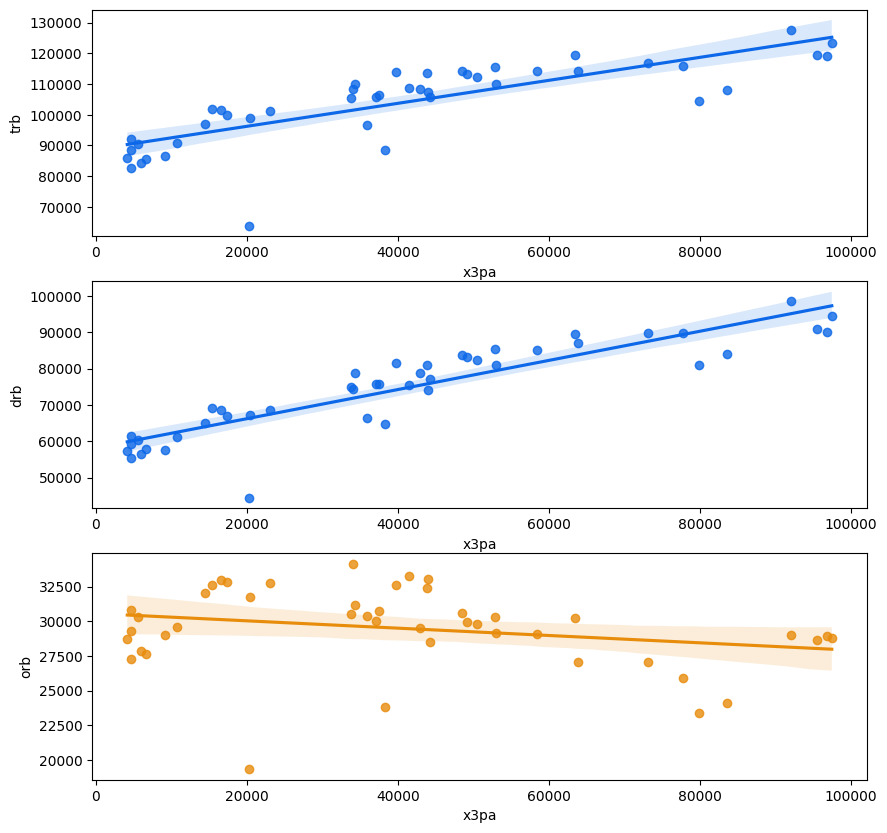

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(10,10))

enmax_palette = ["#0c68e8", "#e88c0c"] #Code Hex จาก html color code
sns.set_palette(palette=enmax_palette)

sns.regplot(data=df_groupby_year, x="x3pa", y="trb", ax=axs[0], color="C0") #C0 คือสีแรก
sns.regplot(data=df_groupby_year, x="x3pa", y="drb", ax=axs[1], color="C0")
sns.regplot(data=df_groupby_year, x="x3pa", y="orb", ax=axs[2], color="C1")
plt.show()

## Position and Rebound

In [ ]:
df_pos_rb = df.loc[ df['season']  > 1979 , ['season','pos','orb', 'drb' , 'trb']]
print(df_pos_rb['pos'].value_counts().reset_index(name='count'))

         pos  count
0         PF   4929
1         SG   4844
2         PG   4701
3          C   4669
4         SF   4456
5      SF-SG     42
6      PG-SG     37
7      PF-SF     35
8      SG-PG     35
9       C-PF     34
10     SG-SF     33
11      PF-C     32
12     SF-PF     26
13     SG-PF      4
14  SG-PG-SF      1
15      SF-C      1
16     PG-SF      1


In [ ]:
df_groupby_pos = df_pos_rb.groupby(['pos'])[['orb', 'drb' , 'trb']].agg('sum').sort_values(by=['trb'], ascending=False).reset_index()
df_groupby_pos = df_groupby_pos.iloc[[0,1,2,3,4]]
df_groupby_pos.style.format("{:,}".format, subset=df_groupby_pos.select_dtypes(include=['number']).columns)

,pos,orb,drb,trb
0,C,"415,966.0","892,320.0","1,308,286.0"
1,PF,"388,526.0","889,922.0","1,278,448.0"
2,SF,"237,298.0","608,293.0","845,591.0"
3,SG,"156,928.0","485,258.0","642,186.0"
4,PG,"116,012.0","438,947.0","554,959.0"


In [ ]:
df_groupby_pos_melt = pd.melt(df_groupby_pos, id_vars=['pos'], value_vars=['orb', 'drb'])
df_groupby_pos_melt.style.format("{:,}".format, subset=df_groupby_pos_melt.select_dtypes(include=['number']).columns)

,pos,variable,value
0,C,orb,"415,966.0"
1,PF,orb,"388,526.0"
2,SF,orb,"237,298.0"
3,SG,orb,"156,928.0"
4,PG,orb,"116,012.0"
5,C,drb,"892,320.0"
6,PF,drb,"889,922.0"
7,SF,drb,"608,293.0"
8,SG,drb,"485,258.0"
9,PG,drb,"438,947.0"


[Barchart](https://www.datacamp.com/datalab/templates/template-python-seaborn-formatting)

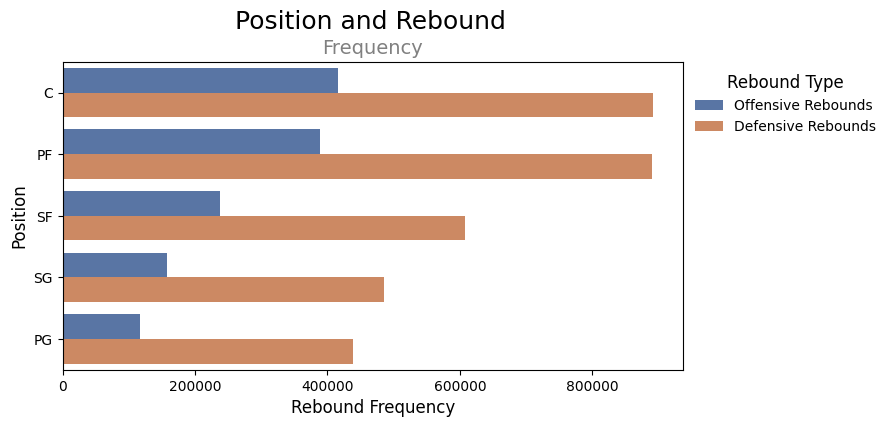

In [ ]:
plt.figure(
    figsize=(8, 4),  # Set the figure size here
    dpi=100,  # Set the dpi (or resolution) here
)
sns.barplot(df_groupby_pos_melt, x="value", y="pos", hue="variable", palette="deep")
plt.suptitle(
    "Position and Rebound",  # Main title text
    fontsize=18,  # Set the font size
    color="black",  # Set the color
    x=0.51,  # Adjust this to align with the subtitle
    y=1.01,  # Adjust this to align with the subtitle
)
plt.title(
    "Frequency",  # Subtitle text
    fontsize=14,  # Set the font size
    color="grey",  # Set the color
)
plt.xlabel("Rebound Frequency", fontsize=12)  # Set the x-axis label and fontsize
plt.xticks(fontsize=10)  # Set the font size of the x-axis ticks
plt.ylabel("Position", fontsize=12)  # Set the y-axis label and fontsize
plt.yticks(fontsize=10)  # Set the font size of the y-axis ticks
handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(
    handles=handles,
    title="Rebound Type",  # Set a title for the legend
    title_fontsize=12,  # Set the legend title size
    fontsize=10,  # Set the fontsize of the legend labels
    bbox_to_anchor=(1.28, 0.65),  # Customize the position of the legend here
    frameon=False,  # Disable the legend border
    labels=[  "Offensive Rebounds","Defensive Rebounds"] # Customize the labels you want in the legend
)
sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

In [ ]:
df_pos_rb = df_pos_rb.loc[ (df_pos_rb['pos'] == 'C') | (df_pos_rb['pos'] == 'PF') | (df_pos_rb['pos'] == 'SF') | (df_pos_rb['pos'] == 'SG') | (df_pos_rb['pos'] == 'PG') , ['season','pos','orb', 'drb' , 'trb']]
df_pos_rb.info()
df_groupby_pos_s = df_pos_rb.groupby(['season','pos'])[['orb', 'drb' , 'trb']].agg('sum').sort_values(by=['season'], ascending=False)
df_groupby_pos_s.style.format("{:,}".format, subset=df_groupby_pos_s.select_dtypes(include=['number']).columns)

<class 'pandas.core.frame.DataFrame'>
Index: 23599 entries, 0 to 23879
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  23599 non-null  int64  
 1   pos     23599 non-null  object 
 2   orb     23599 non-null  float64
 3   drb     23599 non-null  float64
 4   trb     23599 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ MB


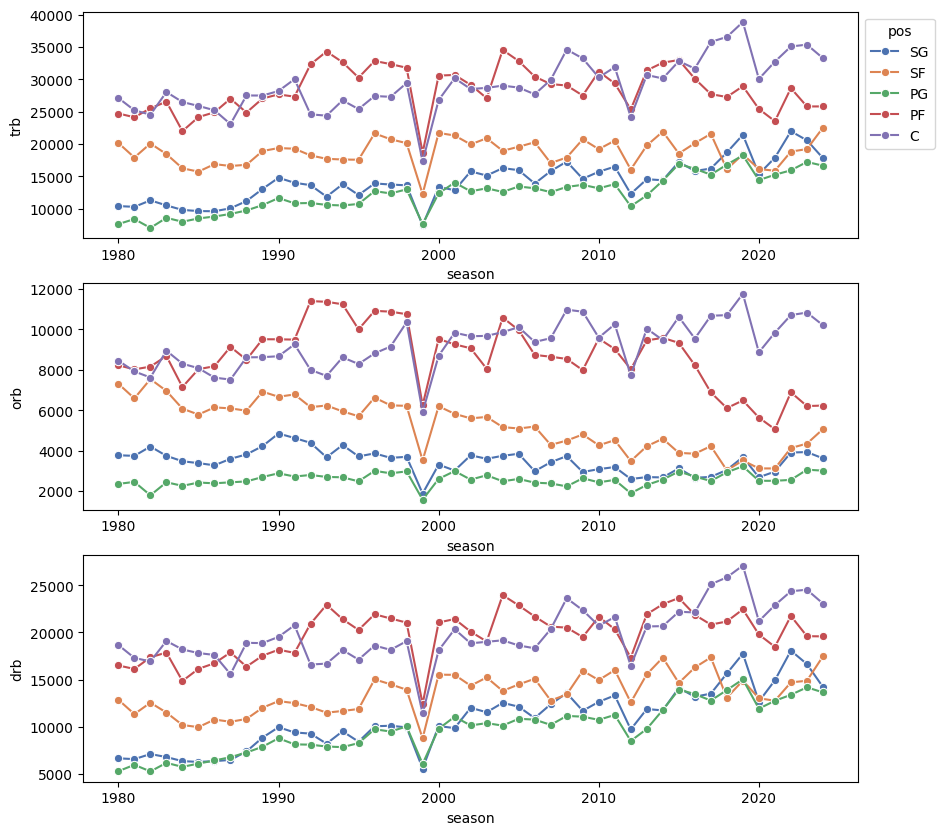

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(10,10))

trb_plot = sns.lineplot(data=df_groupby_pos_s, x="season", y="trb" ,hue='pos', palette="deep" ,marker = "o", ax=axs[0])
orb_plot = sns.lineplot(data=df_groupby_pos_s, x="season", y="orb" ,hue='pos', palette="deep" ,marker = "o", ax=axs[1] , legend=False)
drb_plot = sns.lineplot(data=df_groupby_pos_s, x="season", y="drb" ,hue='pos', palette="deep" ,marker = "o", ax=axs[2] , legend=False)

sns.move_legend(trb_plot, "upper left", bbox_to_anchor=(1, 1))

## Player with 3P

In [ ]:
df_player = df.loc[ df['season']  > 1979 , ['season','player_id', 'player','pos', 'age','experience', 'g' , 'mp','x3pa', 'x3p'] ]
df_player["id:Player"] = df_player["player_id"].astype(str)+ "_" + df_player["player"]
df_player
#df_player.info ()

,season,player_id,player,pos,age,experience,g,mp,x3pa,x3p,id:Player
0,2024,5025,A.J. Green,SG,24.0,2,56,614.0,169.0,69.0,5025_A.J. Green
1,2024,5026,A.J. Lawson,SG,23.0,2,42,311.0,50.0,13.0,5026_A.J. Lawson
2,2024,5027,AJ Griffin,SF,20.0,2,20,171.0,39.0,10.0,5027_AJ Griffin
3,2024,4219,Aaron Gordon,PF,28.0,10,73,2297.0,138.0,40.0,4219_Aaron Gordon
4,2024,4582,Aaron Holiday,PG,27.0,6,78,1269.0,217.0,84.0,4582_Aaron Holiday
...,...,...,...,...,...,...,...,...,...,...,...
23875,1980,1155,Wes Unseld,C,33.0,12,82,2973.0,2.0,1.0,1155_Wes Unseld
23876,1980,1897,Wiley Peck,SF,22.0,1,52,628.0,2.0,0.0,1897_Wiley Peck
23877,1980,1734,Willie Smith,PG,26.0,4,62,1051.0,71.0,17.0,1734_Willie Smith
23878,1980,1844,Winford Boynes,SG,22.0,2,64,1102.0,4.0,0.0,1844_Winford Boynes


In [ ]:
print(df_player['player'].value_counts().reset_index(name='count')) #ถ้า 1 คนมีข้อมูลทุกปี 44 Count

                player  count
0        Eddie Johnson     31
1     Gerald Henderson     29
2        Nazr Mohammed     28
3         Kevin Willis     27
4        Mike Dunleavy     27
...                ...    ...
3581     Keith Appling      1
3582      J.J. O'Brien      1
3583        Duje Dukan      1
3584     Damien Inglis      1
3585      Willie Smith      1

[3586 rows x 2 columns]


In [ ]:
print(df_player['id:Player'].value_counts().reset_index(name='count'))

                id:Player  count
0      3143_Nazr Mohammed     28
1       2187_Kevin Willis     27
2          2932_Joe Smith     26
3       3563_Trevor Ariza     26
4       3166_Vince Carter     26
...                   ...    ...
3608       4221_Alex Kirk      1
3609     4368_Tibor Pleiß      1
3610      4363_Sasha Kaun      1
3611  2614_Richard Coffey      1
3612    1734_Willie Smith      1

[3613 rows x 2 columns]


In [ ]:
Check_85_g = df_player.loc[ df_player['g']  > 82 , :].sort_values('g', ascending=[False])
Check_85_g.head()

,season,player_id,player,pos,age,experience,g,mp,x3pa,x3p,id:Player
14755,2000,2642,Chris Gatling,PF,32.0,9,85,1811.0,70.0,18.0,2642_Chris Gatling
13054,2004,3024,Shareef Abdur-Rahim,PF,27.0,8,85,2684.0,34.0,9.0,3024_Shareef Abdur-Rahim
13076,2004,2959,Theo Ratliff,C,30.0,9,85,2664.0,0.0,0.0,2959_Theo Ratliff
75,2024,4382,Buddy Hield,SF-SG,31.0,8,84,2160.0,568.0,219.0,4382_Buddy Hield
23243,1981,1353,Dave Robisch,C,31.0,10,84,2116.0,0.0,0.0,1353_Dave Robisch


In [ ]:
Check_player_31_Eddie_Johnson = df_player.loc[ df_player['player']  == 'Eddie Johnson' , :].sort_values(['id:Player','season','experience','age','g'],ascending=[True,True,False,True,False])
Check_player_31_Eddie_Johnson
#สุ่มตรวจรายชื่อคนปรากฎว่าใน 1 ปีอาจจะมีชื่อคนซ้ำกัน
#Sort เพื่อให้ตัวบนสุดของ g เป็นรวม

,season,player_id,player,pos,age,experience,g,mp,x3pa,x3p,id:Player
23623,1980,1747,Eddie Johnson,SG,24.0,3,79,2622.0,13.0,5.0,1747_Eddie Johnson
23262,1981,1747,Eddie Johnson,SG,25.0,4,75,2693.0,20.0,6.0,1747_Eddie Johnson
22886,1982,1747,Eddie Johnson,SG,26.0,5,68,2314.0,30.0,7.0,1747_Eddie Johnson
22501,1983,1747,Eddie Johnson,SG,27.0,6,61,1813.0,41.0,14.0,1747_Eddie Johnson
22149,1984,1747,Eddie Johnson,SG,28.0,7,67,1893.0,43.0,16.0,1747_Eddie Johnson
21792,1985,1747,Eddie Johnson,SG,29.0,8,73,2367.0,72.0,22.0,1747_Eddie Johnson
21414,1986,1747,Eddie Johnson,SG,30.0,9,71,1477.0,85.0,29.0,1747_Eddie Johnson
21415,1986,1747,Eddie Johnson,SG,30.0,9,39,862.0,20.0,5.0,1747_Eddie Johnson
21416,1986,1747,Eddie Johnson,SG,30.0,9,32,615.0,65.0,24.0,1747_Eddie Johnson
21052,1987,1747,Eddie Johnson,SG,31.0,10,24,508.0,15.0,5.0,1747_Eddie Johnson


In [ ]:
Check_player_31_Eddie_Johnson.drop_duplicates(subset=['id:Player','season'], keep='first')

,season,player_id,player,pos,age,experience,g,mp,x3pa,x3p,id:Player
23623,1980,1747,Eddie Johnson,SG,24.0,3,79,2622.0,13.0,5.0,1747_Eddie Johnson
23262,1981,1747,Eddie Johnson,SG,25.0,4,75,2693.0,20.0,6.0,1747_Eddie Johnson
22886,1982,1747,Eddie Johnson,SG,26.0,5,68,2314.0,30.0,7.0,1747_Eddie Johnson
22501,1983,1747,Eddie Johnson,SG,27.0,6,61,1813.0,41.0,14.0,1747_Eddie Johnson
22149,1984,1747,Eddie Johnson,SG,28.0,7,67,1893.0,43.0,16.0,1747_Eddie Johnson
21792,1985,1747,Eddie Johnson,SG,29.0,8,73,2367.0,72.0,22.0,1747_Eddie Johnson
21414,1986,1747,Eddie Johnson,SG,30.0,9,71,1477.0,85.0,29.0,1747_Eddie Johnson
21052,1987,1747,Eddie Johnson,SG,31.0,10,24,508.0,15.0,5.0,1747_Eddie Johnson
22887,1982,1993,Eddie Johnson,SF,22.0,1,74,1517.0,11.0,1.0,1993_Eddie Johnson
22502,1983,1993,Eddie Johnson,SF,23.0,2,82,2933.0,71.0,20.0,1993_Eddie Johnson


In [ ]:
Check_player_31_Gerald_Henderson = df_player.loc[ df_player['player']  == 'Gerald Henderson' , :].sort_values(['season','experience','age','g'],ascending=[True,False,True,False]).reset_index()
Check_player_31_Gerald_Henderson
#ชื่อคนสามารถซ้ำกันได้ gerald henderson sr (NBA) from 1979 until 1992
#ชื่อคนสามารถซ้ำกันได้ gerald henderson jr

,index,season,player_id,player,pos,age,experience,g,mp,x3pa,x3p,id:Player
0,23643,1980,1864,Gerald Henderson,PG,24.0,1,76,1061.0,6.0,2.0,1864_Gerald Henderson
1,23284,1981,1864,Gerald Henderson,PG,25.0,2,82,1608.0,16.0,1.0,1864_Gerald Henderson
2,22909,1982,1864,Gerald Henderson,PG,26.0,3,82,1844.0,12.0,2.0,1864_Gerald Henderson
3,22523,1983,1864,Gerald Henderson,PG,27.0,4,82,1551.0,16.0,3.0,1864_Gerald Henderson
4,22171,1984,1864,Gerald Henderson,PG,28.0,5,78,2088.0,57.0,20.0,1864_Gerald Henderson
5,21814,1985,1864,Gerald Henderson,PG,29.0,6,79,2648.0,38.0,9.0,1864_Gerald Henderson
6,21437,1986,1864,Gerald Henderson,PG,30.0,7,82,2568.0,52.0,18.0,1864_Gerald Henderson
7,21069,1987,1864,Gerald Henderson,PG,31.0,8,74,2045.0,77.0,19.0,1864_Gerald Henderson
8,21071,1987,1864,Gerald Henderson,PG,31.0,8,68,1890.0,74.0,19.0,1864_Gerald Henderson
9,21070,1987,1864,Gerald Henderson,PG,31.0,8,6,155.0,3.0,0.0,1864_Gerald Henderson


In [ ]:
Check_player_31_Gerald_Mike_Dunleavy = df_player.loc[ df_player['player']  == 'Mike Dunleavy' , :].sort_values(['season','experience','age','g'],ascending=[True,False,True,False]).reset_index()
Check_player_31_Gerald_Mike_Dunleavy
#ชื่อคนสามารถซ้ำกันได้ Mike Dunleavy sr (NBA) 1990
#ชื่อคนสามารถซ้ำกันได้ Mike Dunleavy jr
#เล่น 2 ตำแหน่งในปีเดียวกัน ออกมา 3 Line
#ตำแหน่งมีผลต่อการชู้ต 3 แต้ม index 2 กับ 3
#SG มี โอกาสยิง 86
#PG มีโอกาสยิง 194

,index,season,player_id,player,pos,age,experience,g,mp,x3pa,x3p,id:Player
0,23758,1980,1713,Mike Dunleavy,PG,25.0,4,51,1036.0,20.0,3.0,1713_Mike Dunleavy
1,23403,1981,1713,Mike Dunleavy,SG,26.0,5,74,1609.0,16.0,1.0,1713_Mike Dunleavy
2,23036,1982,1713,Mike Dunleavy,SG,27.0,6,70,1315.0,86.0,33.0,1713_Mike Dunleavy
3,22658,1983,1713,Mike Dunleavy,PG,28.0,7,79,1619.0,194.0,67.0,1713_Mike Dunleavy
4,22282,1984,1713,Mike Dunleavy,PG,29.0,8,17,404.0,45.0,19.0,1713_Mike Dunleavy
5,21938,1985,1713,Mike Dunleavy,PG,30.0,9,19,433.0,47.0,16.0,1713_Mike Dunleavy
6,20358,1989,1713,Mike Dunleavy,PG,34.0,10,2,5.0,2.0,1.0,1713_Mike Dunleavy
7,19896,1990,1713,Mike Dunleavy,PG,35.0,11,5,43.0,9.0,2.0,1713_Mike Dunleavy
8,13468,2003,3407,Mike Dunleavy,SF,22.0,1,82,1305.0,150.0,52.0,3407_Mike Dunleavy
9,12942,2004,3407,Mike Dunleavy,SF,23.0,2,75,2336.0,254.0,94.0,3407_Mike Dunleavy


In [ ]:
df_player_sort = df_player.sort_values(['id:Player','season','experience','age','g'],ascending=[True,True,False,True,False])
df_player_dup = df_player_sort.drop_duplicates(subset=['id:Player','season'], keep='first')
df_id_player = df_player_dup.groupby(['id:Player','pos'])[['x3pa','x3p', 'g', 'mp']].agg('sum').reset_index()
df_id_player

,id:Player,pos,x3pa,x3p,g,mp
0,1021_Phil Jackson,PF,2.0,0.0,16,194.0
1,1061_Walt Frazier,PG,1.0,0.0,3,27.0
2,1092_Don Chaney,SG,6.0,1.0,60,523.0
3,1101_Elvin Hayes,PF,34.0,5.0,406,12442.0
4,1141_Ron Boone,SG,89.0,30.0,133,3538.0
...,...,...,...,...,...,...
4997,5208_Vasilije Micić,PG,154.0,43.0,60,1176.0
4998,5209_Victor Wembanyama,C,394.0,128.0,71,2106.0
4999,834_Paul Silas,PF,0.0,0.0,82,1595.0
5000,856_Rick Barry,SF,221.0,73.0,72,1816.0


In [ ]:
sns.scatterplot(data=df_id_player, x="x3pa", y="x3p", hue="id:Player")

<Axes: xlabel='x3pa', ylabel='x3p'>

ValueError: Image size of 580x76323 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

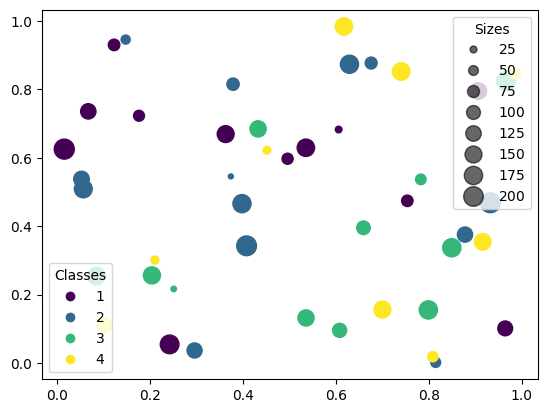

In [ ]:
N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

## 3-Point for Win ? [หมดยุครัว 3 แต้ม](https://stadiumth.com/columns/detail?id=235&tab=inter)